# Data 690 Week 10 Homework
Jessica Conroy
4/13/21

Use the imdb-reviews_2.csv file.

    • Load the data
    • Count the number of positive and negative sentiment
    • Clean the text ‘review’ and create a column called ‘review_processed’
    • Replace short words as
    df['review_processed'] = df['review_processed'].apply(lambda x:
    ' '.join([w for w in x.split() if len(w)>2]))
    • Make entire text lowercase
    • Remove stopwords
    • Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’,
    and ‘even’
    • Add to the list of words
    • Lemmatize the text
    • Convert NLTK tags into ‘wordnet’ tags
    • Find the part of speech tag
    • Lemmatize sentences using POS. Tokenize the sentence and find POS tag for
    each token
    • Define ‘wordnet_tagged.’ If there is no available tag, append the token as is.
    Else, use the tag to lemmatize the token
    • Plot the most frequent words from positive reviews using bar chart. Subset
    positive review dataset, extract words into list and count frequency. Subset top
    30 words by frequency in a horizontal bar chart
    • Create a word cloud
    • Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data
    set into train and test (20%) set
    • Use the GaussianNB to train the model on the training data. Provide the
    accuracy of the model
    • Test the model on the test set
    • Create the confusion matrix and classification report
    • Use Seaborn heatmap to show TP, FP, TN, FN values
    • Use a logistic regression model and check the accuracy of the model for C=0.01,
    0.05, 0.5, 0.5, and 1.
    • Provide the ROC curve. What is the area under the curve?

In [32]:
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords')
from nltk import pos_tag
from nltk.corpus import stopwords 
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15856\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the data
df = pd.read_csv('./imdb-reviews_2.csv')

In [3]:
df.head()

,review,label
0,"first think another Disney movie, might good, ...",1
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",1
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,1


In [4]:
# Count the number of positive and negative sentiment
df['label'].value_counts()

1    2528
0    2472
Name: label, dtype: int64

In [5]:
# Clean the text ‘review’ and create a column called ‘review_processed’
# Make entire text lowercase
# Remove stopwords
# Make custom list of words to be removed including ‘movie’, ‘film’, ‘one’, ‘make’, and ‘even’
# Add to the list of words
# Lemmatize the text
stop = set(stopwords.words('english'))
stop.update(['movie', 'film', 'one', 'make', 'even'])
clean_text = []
for i in df['review']:
    temp = []
    # tokenize the review and convert to lower
    for j in word_tokenize(i):
        lemma = WordNetLemmatizer()
        x =lemma.lemmatize(j)
        temp.append(x.lower())
    # Remove punct and stopwords
    rem_punct = str.maketrans('', '', string.punctuation)
    new_text = [token.translate(rem_punct) for token in temp]
    words = [word for word in new_text if word.isalpha()]
    words = [w for w in words if not w in stop]
    review =' '.join(words)
    clean_text.append(review)
df['review_processed'] = clean_text

In [6]:
df.head()

,review,label,review_processed
0,"first think another Disney movie, might good, ...",1,first think another disney might good kid watc...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put aside dr house repeat missed desperate hou...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work made greater fan kin...
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing tv needless say watch see...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed acting terrific plot jeff combs ...


In [7]:
#Replace short words as
df['review_processed'] = df['review_processed'].apply(lambda x:' '.join([w for w in x.split() if len(w)>2]))

In [8]:
df.head()

,review,label,review_processed
0,"first think another Disney movie, might good, ...",1,first think another disney might good kid watc...
1,"Put aside Dr. House repeat missed, Desperate H...",0,put aside house repeat missed desperate housew...
2,"big fan Stephen King's work, film made even gr...",1,big fan stephen king work made greater fan kin...
3,watched horrid thing TV. Needless say one movi...,0,watched horrid thing needless say watch see mu...
4,truly enjoyed film. acting terrific plot. Jeff...,1,truly enjoyed acting terrific plot jeff combs ...


In [9]:
#Source: https://stackoverflow.com/questions/15586721/wordnet-lemmatization-and-pos-tagging-in-python
#     • Convert NLTK tags into ‘wordnet’ tags
#     • Find the part of speech tag
#     • Lemmatize sentences using POS. Tokenize the sentence and find POS tag for
#     each token
#     • Define ‘wordnet_tagged.’ If there is no available tag, append the token as is.
#     Else, use the tag to lemmatize the token
tag_map = dict({'N': wordnet.NOUN})
tag_map['J'] = wordnet.ADJ
tag_map['V'] = wordnet.VERB
tag_map['R'] = wordnet.ADV

wordnet_tagged = []
for i in df['review_processed']:
    tokens = word_tokenize(i)
    lemma = WordNetLemmatizer()
    review_tagged =[]
    for token, tag in pos_tag(tokens):
        try:
            lemmatized = lemma.lemmatize(token, tag_map[tag[0]])
            #print(token, "=>", lemmatized)
            review_tagged.append(lemmatized)
        except:
            lemmatized = lemma.lemmatize(token)
            review_tagged.append(lemmatized)
    wordnet_tagged.append(review_tagged)
df['wordnet_tagged'] = wordnet_tagged
print(wordnet_tagged)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [10]:
df.head().T

,0,1,2,3,4
review,"first think another Disney movie, might good, ...","Put aside Dr. House repeat missed, Desperate H...","big fan Stephen King's work, film made even gr...",watched horrid thing TV. Needless say one movi...,truly enjoyed film. acting terrific plot. Jeff...
label,1,0,1,0,1
review_processed,first think another disney might good kid watc...,put aside house repeat missed desperate housew...,big fan stephen king work made greater fan kin...,watched horrid thing needless say watch see mu...,truly enjoyed acting terrific plot jeff combs ...
wordnet_tagged,"[first, think, another, disney, might, good, k...","[put, aside, house, repeat, miss, desperate, h...","[big, fan, stephen, king, work, make, great, f...","[watch, horrid, thing, needless, say, watch, s...","[truly, enjoyed, act, terrific, plot, jeff, co..."


[('like', 4452), ('see', 4198), ('get', 3655), ('good', 3324), ('time', 3102), ('well', 2826), ('character', 2758), ('watch', 2709), ('story', 2649), ('would', 2622), ('bad', 2462), ('think', 2384), ('really', 2336), ('show', 2230), ('make', 2184), ('scene', 2085), ('look', 2052), ('great', 2015), ('say', 1959), ('much', 1953), ('end', 1888), ('could', 1879), ('know', 1860), ('people', 1856), ('also', 1851), ('first', 1799), ('give', 1787), ('take', 1777), ('play', 1766), ('come', 1745)]


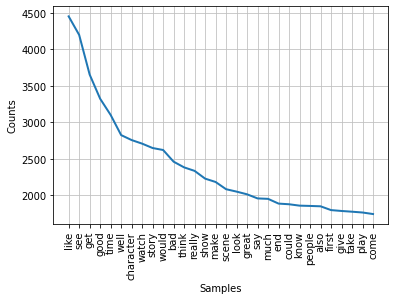

In [17]:
# Plot the most frequent words from positive reviews using bar chart. Subset
# positive review dataset, extract words into list and count frequency. Subset top
# 30 words by frequency in a horizontal bar chart

#get text of pos reviews
pos_df = df[df['label'] == 1]
pos_text = []
for i in df['wordnet_tagged']:
    pos_text= pos_text + i
#     print(i)
from nltk.probability import FreqDist
fdist = FreqDist(pos_text)

# Ten most common words
print(fdist.most_common(30))

# Frequency Distribution Plots
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

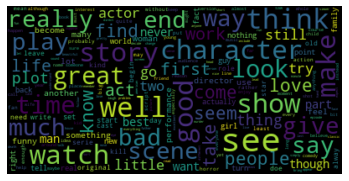

In [19]:
#Create a word cloud

from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
# lower max_font_size/
wordcloud = WordCloud(max_font_size=40).generate(" ".join(pos_text))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [22]:
# Import CountVectorizer and create a sparse matrix of 2,500 tokens. Split the data set into train and test (20%) set
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
n_tokens = 2500

cleaned_text = []
for i in df['wordnet_tagged']:
    cleaned_text.append(" ".join(i))

vectorizer = CountVectorizer(max_features=n_tokens, stop_words='english')
vectorizer.fit(cleaned_text)
features = vectorizer.fit_transform(cleaned_text)
featuresA = features.toarray() 

X_train, X_test, y_train, y_test  = train_test_split(
        featuresA, 
        df['label'],
        train_size=0.80, 
        random_state=432021)

In [25]:
#Use the GaussianNB to train the model on the training data. Provide the accuracy of the model
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import plot_confusion_matrix

model = GaussianNB()
model.fit(X_train, y_train)

# Test the model on the test set
prediction = model.predict(X_test)
print('Accuracy Score: ')
print(accuracy_score(y_test, prediction))

Accuracy Score: 
0.682


Classification Report: 
              precision    recall  f1-score   support

           0       0.66      0.82      0.73       520
           1       0.73      0.54      0.62       480

    accuracy                           0.68      1000
   macro avg       0.69      0.68      0.67      1000
weighted avg       0.69      0.68      0.67      1000

Confusion Matrix: 


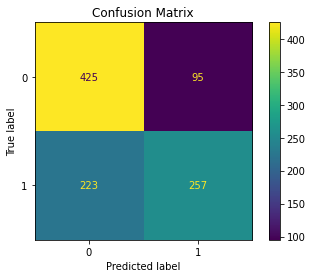

In [29]:
# Create the confusion matrix and classification report

print('Classification Report: ')
print(classification_report(y_test, prediction))

print('Confusion Matrix: ')
disp = plot_confusion_matrix(model, X_test, y_test)
disp.ax_.set_title('Confusion Matrix')
plt.show()

Text(0.5, 15.0, 'Predicted label')

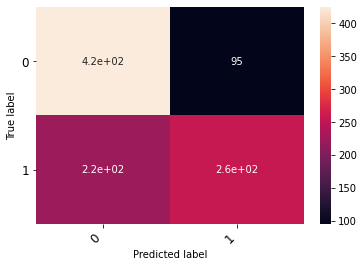

In [37]:
#Use Seaborn heatmap to show TP, FP, TN, FN values
import seaborn as sns

fontsize = 12
heatmap = sns.heatmap(confusion_matrix(y_test, prediction), annot=True)
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [47]:
#Use a logistic regression model and check the accuracy of the model for C=0.01, 0.05, 0.5, 0.5, and 1.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logreg = LogisticRegression()
parameters = {'C':[0.01, 0.05, 0.5, 0.5, 1]}
model = GridSearchCV(estimator = logreg,
                        param_grid = parameters,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 10)
model.fit(X_train, y_train)

# Test the model on the test set
print(model.best_estimator_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............................. C=0.01, score=0.829, total=   0.2s
[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.850, total=   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s



[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.829, total=   0.2s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] C=0.01 ..........................................................
[CV] .............................. C=0.01, score=0.815, total=   0.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV] C=0.01 ..........................................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.7s remaining:    0.0s


[CV] .............................. C=0.01, score=0.829, total=   0.2s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s


[CV] .............................. C=0.05, score=0.835, total=   0.3s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.2s remaining:    0.0s


[CV] .............................. C=0.05, score=0.858, total=   0.3s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.5s remaining:    0.0s


[CV] .............................. C=0.05, score=0.830, total=   0.3s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.8s remaining:    0.0s


[CV] .............................. C=0.05, score=0.828, total=   0.3s
[CV] C=0.05 ..........................................................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.1s remaining:    0.0s


[CV] .............................. C=0.05, score=0.834, total=   0.3s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.820, total=   0.5s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.844, total=   0.6s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.811, total=   0.5s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.818, total=   0.5s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.830, total=   0.5s
[CV] C=0.5 ...........................................................
[CV] ............................... C=0.5, score=0.820, total=   0.5s
[CV] C=0.5 ...........................................................
[CV] .

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:   10.8s finished


LogisticRegression(C=0.05)


In [48]:
print(model.score(X_test, y_test))

0.821


In [51]:
# Provide the ROC curve. What is the area under the curve?
#used: https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ as a resource
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

model = LogisticRegression(C=0.05)
model.fit(X_train, y_train)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
print('No Skill: ROC AUC=%.3f' % (ns_auc)) #area under the curve
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.900


In [52]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

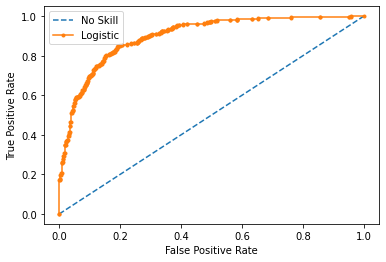

In [56]:
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()